In [1]:
from pyspark import SparkConf, SparkContext


In [2]:
conf = SparkConf().setMaster("local").setAppName("MovieRatingsDistribution")
sc = SparkContext(conf = conf)

In [3]:
movieId = '127'
movieIdColIdx = 1
ratingColIdx = 2 

In [6]:
linesRDD = sc.textFile(r"C:\ml-100k\u.data")
movieRatingsRDD = linesRDD.filter(lambda x: x.split()[movieIdColIdx] == movieId)


In [7]:
ratingsHistogram = movieRatingsRDD \
                .map(lambda x: (x.split()[ratingColIdx], 1)) \
                .reduceByKey(lambda a, b: a + b) \
                .collect()

print('\nRating distribution is for movie Godfather', ratingsHistogram)
print('\n')


Rating distribution is for movie Godfather [('4', 137), ('2', 23), ('5', 214), ('3', 33), ('1', 6)]




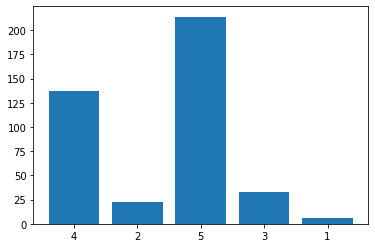

In [16]:
import matplotlib.pylab as plt
import numpy as np
x1,y1 = zip(*ratingsHistogram)
plt.bar(np.array(x1), y1)
plt.show()